# Step 03: Data Scaling and 'Vanilla' Modeling

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTENC

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  d

### Import Data

In [2]:
X_train = pd.read_csv('../data/X_train_trans.csv', index_col=0)

pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

## Confusion Matrix Function

In [3]:
#creating a confusion matrix template
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Intantiate LogisticRegression using defalt values

In [4]:
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
logreg.score(X_train, y_train)

0.8829832833261895

In [6]:
y_pred = logreg.predict(X_train)

In [7]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[1948,   47],
       [ 226,  112]])

Confusion Matrix, without normalization
[[1948   47]
 [ 226  112]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1995
           1       0.70      0.33      0.45       338

    accuracy                           0.88      2333
   macro avg       0.80      0.65      0.69      2333
weighted avg       0.87      0.88      0.86      2333

roc_auc_score: 0.6539010247512271


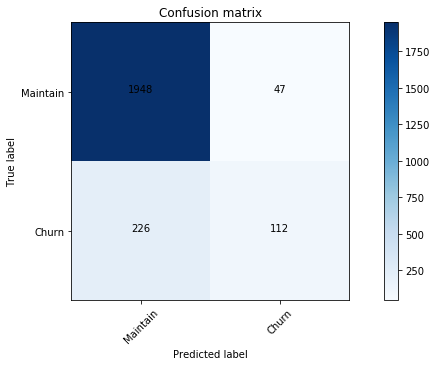

In [8]:
from sklearn.metrics import confusion_matrix
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred))

In [42]:
print('Precision: {}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(precision_score(y_train, y_pred), 
                accuracy_score(y_train, y_pred), 
                recall_score(y_train, y_pred), 
                f1_score(y_train, y_pred)))

Precision: 0.7044025157232704
Accuracy: 0.8829832833261895
Recall: 0.33136094674556216
F1: 0.4507042253521127


### LogisticRegressionCV

In [10]:
logcv = LogisticRegressionCV(Cs = [.06, 0.07, 0.08, .09, .1],
                             cv=5, 
                             max_iter=10000, 
                             verbose =1, 
                             scoring = 'precision',
                             n_jobs=-1)

In [11]:
lcv = logcv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [12]:
lcv.scores_


{1: array([[0.57894737, 0.6       , 0.6       , 0.61904762, 0.61904762],
        [0.5       , 0.5       , 0.625     , 0.625     , 0.625     ],
        [0.55555556, 0.57894737, 0.55      , 0.55      , 0.57142857],
        [0.54545455, 0.56      , 0.53846154, 0.57142857, 0.55172414],
        [0.73684211, 0.73684211, 0.73684211, 0.73684211, 0.73684211]])}

In [13]:
cv_means = []
cs = -4
run = 1
for cv in lcv.scores_[1]:
    cv_means.append((run, '1e{}'.format(cs), cv.max()))
    cs += 1
    run += 1

In [14]:
cv_df = pd.DataFrame(cv_means, columns = ['run', 'Cs', 'cv_mean'])

In [15]:
cv_df

,run,Cs,cv_mean
0,1,1e-4,0.619048
1,2,1e-3,0.625000
2,3,1e-2,0.578947
3,4,1e-1,0.571429
4,5,1e0,0.736842


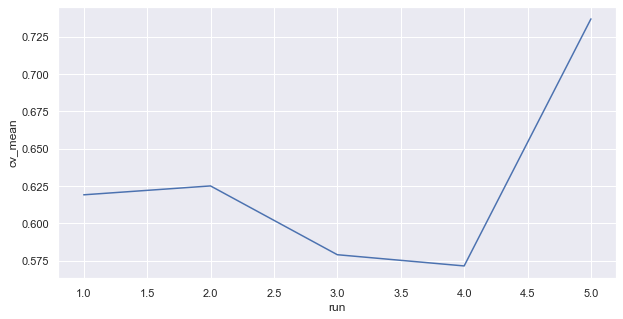

In [16]:
sns.set()
sns.lineplot(data=cv_df, x = 'run', y = 'cv_mean');

### Let's try SMOTE and see if we see any improvements

In [17]:
list(enumerate(X_train.columns.tolist()));

In [18]:
catigoricals = list(range(18, len(X_train.columns)))

In [19]:
sm = SMOTENC(random_state=3, categorical_features=catigoricals, n_jobs=-1)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [20]:
X_sm.shape, y_sm.shape

((3990, 167), (3990,))

In [21]:
X_sm_df = pd.DataFrame(X_sm, columns = X_train.columns)

### LogReg with SMOTE

In [22]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=10000)
logreg.fit(X_sm_df, y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
logreg.score(X_sm_df, y_sm)

0.9253132832080201

In [24]:
y_pred2 = logreg.predict(X_sm_df)

In [25]:
cm2 = confusion_matrix(y_sm, y_pred2)
cm2

array([[1904,   91],
       [ 207, 1788]])

Confusion Matrix, without normalization
[[1904   91]
 [ 207 1788]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1995
           1       0.70      0.33      0.45       338

    accuracy                           0.88      2333
   macro avg       0.80      0.65      0.69      2333
weighted avg       0.87      0.88      0.86      2333

roc_auc_score: 0.9253132832080201


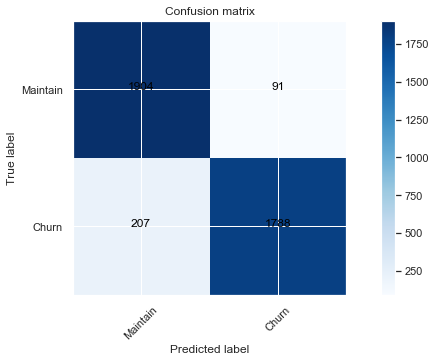

In [30]:
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm2, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_sm, y_pred2))

In [43]:
print('Precision: {}\nAccuracy: {}\nRecall: {}\nF1: {}'.format(precision_score(y_sm, y_pred2), 
                accuracy_score(y_sm, y_pred2), 
                recall_score(y_sm, y_pred2), 
                f1_score(y_sm, y_pred2)))

Precision: 0.9515699840340607
Accuracy: 0.9253132832080201
Recall: 0.8962406015037594
F1: 0.9230769230769231


In [28]:
### X_train (original), X_train_trans (transformed), X_test, y_train, y_test
### Export X_train (original), X_train_sm (smote), and X_test
X_sm_df.to_csv('../data/X_train_sm.csv')

### Export y_train (original), y_train_sm (smote), and y_test
pickle_out = open('../data/y_train_sm.pickle', 'wb')
pickle.dump(y_sm, pickle_out)